# Predicting the RH Type

### Importing the Required Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Training Dataset

In [3]:
df = pd.read_csv('Train_Data_Final.csv')

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type,id
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,Ideal,1
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,Ideal,2
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,Slightly Elevated,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,Slightly Elevated,4
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,Slightly Elevated,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8000 non-null   object 
 1   Time           8000 non-null   object 
 2   CO(GT)         8000 non-null   float64
 3   PT08.S1(CO)    8000 non-null   float64
 4   NMHC(GT)       8000 non-null   int64  
 5   C6H6(GT)       8000 non-null   float64
 6   PT08.S2(NMHC)  8000 non-null   float64
 7   NOx(GT)        8000 non-null   float64
 8   PT08.S3(NOx)   8000 non-null   float64
 9   NO2(GT)        8000 non-null   float64
 10  PT08.S4(NO2)   8000 non-null   float64
 11  PT08.S5(O3)    8000 non-null   float64
 12  T              8000 non-null   float64
 13  AH             8000 non-null   float64
 14  RH_type        8000 non-null   object 
 15  id             8000 non-null   int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 1000.1+ KB


In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
count,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000
mean,-39.616450,1051.229542,-152.15075,2.853485,911.693740,149.083150,810.813437,45.164962,1445.371906,979.734292,11.542394,-6.182181,4000.50000
std,81.895617,324.514858,150.07985,39.972683,339.978463,260.591289,321.352129,129.313917,455.400332,449.183717,41.830243,37.526459,2309.54541
min,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,1.00000
25%,0.500000,917.000000,-200.00000,4.293956,726.750000,39.000000,651.937500,44.000000,1275.187500,709.937500,12.325000,0.779140,2000.75000
50%,1.500000,1051.250000,-200.00000,8.279845,910.625000,122.000000,806.750000,90.000000,1493.375000,942.000000,18.700000,1.031560,4000.50000
75%,2.600000,1225.000000,-200.00000,14.152558,1121.562500,259.175000,975.500000,125.000000,1697.750000,1253.437500,25.125000,1.358336,6000.25000
max,11.900000,2039.750000,1189.00000,63.741476,2214.000000,1479.000000,2682.750000,332.600000,2775.000000,2522.750000,44.600000,2.231036,8000.00000


### Pre-Processing the Data

In [7]:
df.drop(columns = ['Date', 'Time', 'id'], inplace = True)

In [8]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,Ideal
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,Ideal
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,Slightly Elevated
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,Slightly Elevated
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,Slightly Elevated


It is observed that this is a classification problem, where we need to predict the RH Type based on the given set of parameters

In [9]:
df.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
AH               0
RH_type          0
dtype: int64

Here, we notice that there are no null values in the dataset.

In [10]:
df.RH_type.value_counts()

Ideal                2673
Dry                  1570
Slightly Elevated    1530
Elevated             1248
High                  979
Name: RH_type, dtype: int64

Here, majority of the data contains the information of Ideal Condition

<AxesSubplot:>

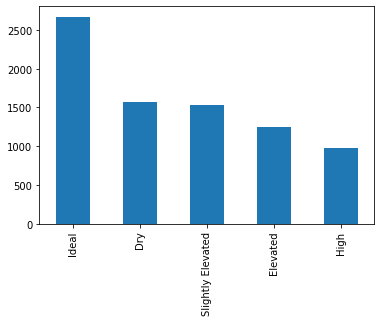

In [11]:
df.RH_type.value_counts().plot(kind = 'bar')

<AxesSubplot:>

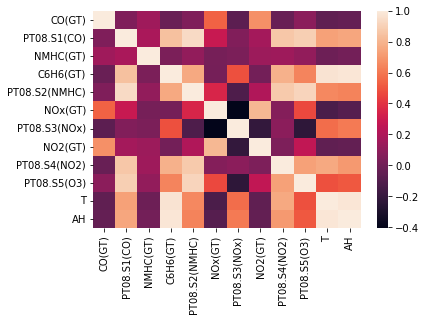

In [12]:
sns.heatmap(df.corr())

Here, we observe the correlation between the factors in the dataset, where certain parameters like C6H6(GT) is highly correlated to T & AH.

In [13]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,0.757754,Ideal
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,0.725487,Ideal
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,0.750239,Slightly Elevated
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,0.786713,Slightly Elevated
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,0.788794,Slightly Elevated


### Normalising the Data for the Training Data

In [14]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']])
train_df = pd.DataFrame(d, columns= ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'])
train_df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.587683,0.635966,0.538977,0.873262,0.992715
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.548254,0.591176,0.430539,0.872036,0.992555
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.589561,0.589748,0.467909,0.866312,0.992678
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.604581,0.599580,0.515380,0.862633,0.992858
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.593316,0.568067,0.481131,0.863246,0.992868
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.950448,0.507869,0.000000,0.772225,0.369511,0.234008,0.394415,0.655276,0.337731,0.344137,0.841271,0.990593
7996,0.949033,0.489452,0.000000,0.768221,0.342585,0.213103,0.427803,0.612655,0.329916,0.297493,0.839636,0.990602
7997,0.948561,0.494363,0.000000,0.767477,0.337096,0.208338,0.434308,0.600451,0.330000,0.303737,0.838512,0.990628
7998,0.949033,0.492131,0.000000,0.767408,0.336578,0.196724,0.433354,0.581112,0.328319,0.281241,0.837388,0.990600


In [15]:
target = df['RH_type']

In [16]:
train_df = train_df.join(target)

In [17]:
train_df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.587683,0.635966,0.538977,0.873262,0.992715,Ideal
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.548254,0.591176,0.430539,0.872036,0.992555,Ideal
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.589561,0.589748,0.467909,0.866312,0.992678,Slightly Elevated
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.604581,0.599580,0.515380,0.862633,0.992858,Slightly Elevated
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.593316,0.568067,0.481131,0.863246,0.992868,Slightly Elevated
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.950448,0.507869,0.000000,0.772225,0.369511,0.234008,0.394415,0.655276,0.337731,0.344137,0.841271,0.990593,Ideal
7996,0.949033,0.489452,0.000000,0.768221,0.342585,0.213103,0.427803,0.612655,0.329916,0.297493,0.839636,0.990602,Ideal
7997,0.948561,0.494363,0.000000,0.767477,0.337096,0.208338,0.434308,0.600451,0.330000,0.303737,0.838512,0.990628,Ideal
7998,0.949033,0.492131,0.000000,0.767408,0.336578,0.196724,0.433354,0.581112,0.328319,0.281241,0.837388,0.990600,Ideal


In [18]:
df.head(20)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,0.757754,Ideal
1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,0.725487,Ideal
2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,0.750239,Slightly Elevated
3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,0.786713,Slightly Elevated
4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,0.788794,Slightly Elevated
5,1.2,1197.00,38,4.741012,750.25,89.0,1336.50,96.0,1393.00,949.25,11.175,0.784772,Slightly Elevated
6,1.2,1185.00,31,3.624399,689.50,62.0,1461.75,77.0,1332.75,732.50,11.325,0.760312,Slightly Elevated
7,1.0,1136.25,31,3.326677,672.00,62.0,1453.25,76.0,1332.75,729.50,10.675,0.770238,Slightly Elevated
8,0.9,1094.00,24,2.339416,608.50,45.0,1579.00,60.0,1276.00,619.50,10.650,0.764819,Slightly Elevated
9,0.6,1009.75,19,1.696658,560.75,-200.0,1705.00,-200.0,1234.75,501.25,10.250,0.751657,Elevated


### Encoding the Target Column

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
le = LabelEncoder()

label = le.fit_transform(train_df['RH_type'])

label

array([3, 3, 4, ..., 3, 3, 3])

0: Dry
1: Elevated 
2: High
3: Ideal
4: Slightly Elevated


train_df['RH_type'].replace({'':3, 'B':2, 'C':1}, inplace=True)

In [21]:
train_df.drop("RH_type", axis=1, inplace=True)

train_df["RH_type"] = label

In [22]:
train_df

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.587683,0.635966,0.538977,0.873262,0.992715,3
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.548254,0.591176,0.430539,0.872036,0.992555,3
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.589561,0.589748,0.467909,0.866312,0.992678,4
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.604581,0.599580,0.515380,0.862633,0.992858,4
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.593316,0.568067,0.481131,0.863246,0.992868,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.950448,0.507869,0.000000,0.772225,0.369511,0.234008,0.394415,0.655276,0.337731,0.344137,0.841271,0.990593,3
7996,0.949033,0.489452,0.000000,0.768221,0.342585,0.213103,0.427803,0.612655,0.329916,0.297493,0.839636,0.990602,3
7997,0.948561,0.494363,0.000000,0.767477,0.337096,0.208338,0.434308,0.600451,0.330000,0.303737,0.838512,0.990628,3
7998,0.949033,0.492131,0.000000,0.767408,0.336578,0.196724,0.433354,0.581112,0.328319,0.281241,0.837388,0.990600,3


### Importing the Test Data

In [23]:
test_df = pd.read_csv('Test_Data.csv')

In [24]:
test_df.head()

,Unnamed: 0,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,id
0,8000,2005-02-07,02:00:00,0.8,863.00,-200,1.504175,545.00,85.6,1119.25,78.4,748.75,483.50,4.325,0.320679,1
1,8001,2005-02-07,03:00:00,0.6,860.75,-200,1.200205,518.25,-200.0,1140.75,-200.0,737.50,481.50,3.875,0.325031,2
2,8002,2005-02-07,04:00:00,0.6,852.25,-200,0.831325,481.50,66.6,1186.50,65.1,725.75,496.00,3.800,0.332693,3
3,8003,2005-02-07,05:00:00,0.6,879.25,-200,0.962585,495.25,75.1,1146.50,72.5,752.75,622.75,3.300,0.349882,4
4,8004,2005-02-07,06:00:00,0.6,899.50,-200,1.268602,524.50,96.9,1090.00,84.6,780.25,695.75,3.650,0.357384,5


### Pre-Processing the Test Data

In [25]:
test_df.drop(columns = ['Unnamed: 0', 'Date', 'Time', 'id'], inplace = True)

In [26]:
test_df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.8,863.00,-200,1.504175,545.00,85.6,1119.25,78.4,748.75,483.50,4.325,0.320679
1,0.6,860.75,-200,1.200205,518.25,-200.0,1140.75,-200.0,737.50,481.50,3.875,0.325031
2,0.6,852.25,-200,0.831325,481.50,66.6,1186.50,65.1,725.75,496.00,3.800,0.332693
3,0.6,879.25,-200,0.962585,495.25,75.1,1146.50,72.5,752.75,622.75,3.300,0.349882
4,0.6,899.50,-200,1.268602,524.50,96.9,1090.00,84.6,780.25,695.75,3.650,0.357384


In [29]:
X_test.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
AH               0
dtype: int64

### Normalising the Test Data

In [30]:
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(test_df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']])
X_test = pd.DataFrame(d, columns= ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'])
X_test.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.963532,0.519614,0.0,0.855756,0.397439,0.200182,0.658226,0.515842,0.404283,0.253759,0.888370,0.994675
1,0.962572,0.518514,0.0,0.854465,0.383169,0.000000,0.668953,0.000000,0.399489,0.253017,0.886413,0.994697
2,0.962572,0.514359,0.0,0.852898,0.363564,0.186865,0.691780,0.491199,0.394482,0.258400,0.886087,0.994735
3,0.962572,0.527557,0.0,0.853456,0.370899,0.192823,0.671822,0.504910,0.405987,0.305458,0.883913,0.994820
4,0.962572,0.537456,0.0,0.854755,0.386503,0.208103,0.643632,0.527330,0.417705,0.332560,0.885435,0.994858


### Splitting the Test and Train Data

In [31]:
X_train = train_df.drop(columns = ["RH_type"])

In [32]:
X_train.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.956111,0.696506,0.251980,0.803369,0.515949,0.217987,0.435782,0.587683,0.635966,0.538977,0.873262,0.992715
1,0.953280,0.666257,0.224622,0.793949,0.478355,0.180465,0.476541,0.548254,0.591176,0.430539,0.872036,0.992555
2,0.954224,0.715258,0.207343,0.792434,0.471935,0.197141,0.464834,0.589561,0.589748,0.467909,0.866312,0.992678
3,0.954224,0.703427,0.201584,0.793310,0.475663,0.221560,0.448183,0.604581,0.599580,0.515380,0.862633,0.992858
4,0.951392,0.657328,0.180706,0.783033,0.428956,0.197141,0.487382,0.593316,0.568067,0.481131,0.863246,0.992868


In [33]:
y_train = train_df['RH_type']

In [34]:
y_train.head()

0    3
1    3
2    4
3    4
4    4
Name: RH_type, dtype: int64

In [35]:
X_test.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.963532,0.519614,0.0,0.855756,0.397439,0.200182,0.658226,0.515842,0.404283,0.253759,0.888370,0.994675
1,0.962572,0.518514,0.0,0.854465,0.383169,0.000000,0.668953,0.000000,0.399489,0.253017,0.886413,0.994697
2,0.962572,0.514359,0.0,0.852898,0.363564,0.186865,0.691780,0.491199,0.394482,0.258400,0.886087,0.994735
3,0.962572,0.527557,0.0,0.853456,0.370899,0.192823,0.671822,0.504910,0.405987,0.305458,0.883913,0.994820
4,0.962572,0.537456,0.0,0.854755,0.386503,0.208103,0.643632,0.527330,0.417705,0.332560,0.885435,0.994858


### Checking for Feature Importance in Training Dataset

In [36]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

/Users/tanmaynema/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


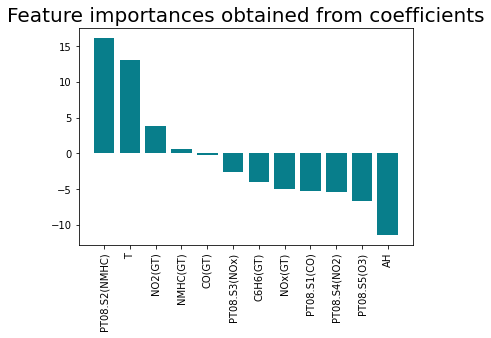

In [37]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

Here, we can notice that some factors have a huge impact on the target column, whereas NMHC(GT), CO(GT) have a very minimised impact on the same.

In [38]:
feat_imp_df = train_df.drop(columns = ['NMHC(GT)', 'CO(GT)'])

In [39]:
feat_imp_df.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,RH_type
0,0.696506,0.803369,0.515949,0.217987,0.435782,0.587683,0.635966,0.538977,0.873262,0.992715,3
1,0.666257,0.793949,0.478355,0.180465,0.476541,0.548254,0.591176,0.430539,0.872036,0.992555,3
2,0.715258,0.792434,0.471935,0.197141,0.464834,0.589561,0.589748,0.467909,0.866312,0.992678,4
3,0.703427,0.793310,0.475663,0.221560,0.448183,0.604581,0.599580,0.515380,0.862633,0.992858,4
4,0.657328,0.783033,0.428956,0.197141,0.487382,0.593316,0.568067,0.481131,0.863246,0.992868,4


In [40]:
X_train1 = feat_imp_df.drop(columns = ["RH_type"])

In [41]:
y_train1 = feat_imp_df['RH_type']

In [42]:
feat_imp_train = test_df.drop(columns = ['NMHC(GT)', 'CO(GT)'])

In [43]:
scaler = preprocessing.MinMaxScaler()

d = scaler.fit_transform(test_df[['PT08.S1(CO)','C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']])
X_test1 = pd.DataFrame(d, columns= ['PT08.S1(CO)','C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'])
X_test1.head()

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S4(NO2),PT08.S5(O3),T,AH
0,0.519614,0.855756,0.397439,0.200182,0.404283,0.253759,0.888370,0.994675
1,0.518514,0.854465,0.383169,0.000000,0.399489,0.253017,0.886413,0.994697
2,0.514359,0.852898,0.363564,0.186865,0.394482,0.258400,0.886087,0.994735
3,0.527557,0.853456,0.370899,0.192823,0.405987,0.305458,0.883913,0.994820
4,0.537456,0.854755,0.386503,0.208103,0.417705,0.332560,0.885435,0.994858


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [45]:
X_train2, X_test1, y_train2, y_test1 = train_test_split(
    X_train1, y_train1, test_size=0.33, random_state=42)

In [48]:
rfc2 = RandomForestClassifier(random_state=42)
model_rfc2 = rfc2.fit(X_train2,y_train2)
tr_pred_rfc2 = model_rfc2.predict(X_train2)
ts_pred_rfc2 = model_rfc2.predict(X_test1)

print("training accuracy is:", accuracy_score(y_train2,tr_pred_rfc2))

training accuracy is: 1.0


## Model Training

### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [49]:
rfc= RandomForestClassifier(random_state=42)
model_rfc = rfc.fit(X_train,y_train)
tr_pred_rfc = model_rfc.predict(X_train)
ts_pred_rfc = model_rfc.predict(X_test)

print("Training Accuracy is:", accuracy_score(y_train,tr_pred_rfc))

Training Accuracy is: 1.0


In [50]:
ts_pred_rfc

array([3, 3, 4, ..., 0, 0, 0])

### Preparing the Submission File

In [51]:
sample_submission = pd.read_csv('sample_submission.csv')

In [52]:
sample_submission.head()

,Unnamed: 0,id,RH_type
0,0,1,Ideal
1,1,2,Ideal
2,2,3,Ideal
3,3,4,Ideal
4,4,5,Ideal


In [53]:
sample_submission.drop("RH_type", axis=1, inplace=True)

sample_submission["RH_type"] = ts_pred_rfc

In [54]:
sample_submission.head()

,Unnamed: 0,id,RH_type
0,0,1,3
1,1,2,3
2,2,3,4
3,3,4,4
4,4,5,4


0: Dry

1: Elevated 

2: High

3: Ideal

4: Slightly Elevated

In [55]:
sample_submission['RH_type'].replace({0:'Dry', 1:'Elevated', 2: 'High', 3: 'Ideal', 4: 'Slightly Elevated'}, inplace=True)

In [56]:
sample_submission.head()

,Unnamed: 0,id,RH_type
0,0,1,Ideal
1,1,2,Ideal
2,2,3,Slightly Elevated
3,3,4,Slightly Elevated
4,4,5,Slightly Elevated


In [57]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357 entries, 0 to 1356
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1357 non-null   int64 
 1   id          1357 non-null   int64 
 2   RH_type     1357 non-null   object
dtypes: int64(2), object(1)
memory usage: 31.9+ KB


In [58]:
sample_submission.RH_type.value_counts()

Ideal                784
Dry                  257
High                 171
Elevated              73
Slightly Elevated     72
Name: RH_type, dtype: int64

In [59]:
sample_submission.head()

,Unnamed: 0,id,RH_type
0,0,1,Ideal
1,1,2,Ideal
2,2,3,Slightly Elevated
3,3,4,Slightly Elevated
4,4,5,Slightly Elevated


In [60]:
sample_submission.drop("Unnamed: 0", axis=1, inplace=True)

In [61]:
sample_submission.head()

,id,RH_type
0,1,Ideal
1,2,Ideal
2,3,Slightly Elevated
3,4,Slightly Elevated
4,5,Slightly Elevated


In [63]:
sample_submission.to_csv('submission.csv')